In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data.csv")
print(df)

             Date Time (utc)                                Region  Magnitude  \
0      23/06/2024   04:51:49                  Mindanao, Philippine        4.8   
1      23/06/2024   03:58:03               Near Coast of Venezuela        5.9   
2      23/06/2024   03:12:08      Near East Coast of Honshu, japan        5.0   
3      22/06/2024   20:46:51                    Near Coast of Peru        5.3   
4      22/06/2024   18:08:44  Afghanistan-Tajikistan Border Region        3.8   
...           ...        ...                                   ...        ...   
14721  27/11/2015   16:40:28                Near Sirinagar Kashmir        4.8   
14722  26/11/2015   16:18:00                         Dadu Pakistan        3.0   
14723  22/11/2015   18:16:04         Afghanistan-Tajikistan Border        6.2   
14724  19/11/2015   23:38:47                 50 km East of Bhakkar        3.8   
14725  12/04/2015   03:36:12                        Near Abbatabad        2.3   

       Depth (km) Latitude 

In [3]:
print(df.describe())

          Magnitude    Depth (km)
count  14726.000000  14726.000000
mean       4.465259     94.491783
std        1.048695    116.171875
min        0.700000      0.000000
25%        3.700000     11.000000
50%        4.600000     60.000000
75%        5.200000    134.000000
max       37.000000   3654.000000


In [4]:
print(df.isnull().sum()) # number of missing values in each column

Date            0
Time (utc)      0
Region          0
Magnitude       0
Depth (km)      0
Latitude        0
Longitude       0
Mode            0
Map           128
dtype: int64


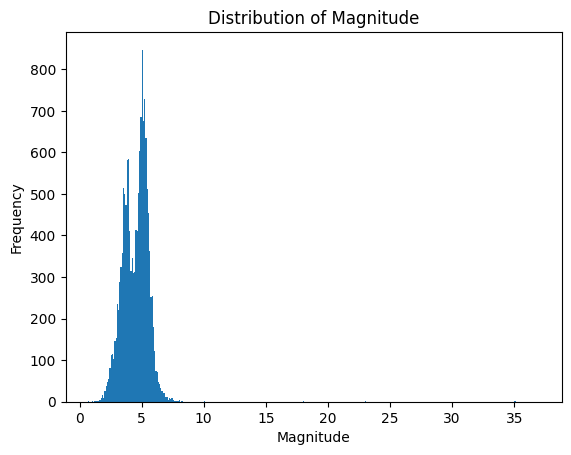

In [5]:
min_magnitude = df["Magnitude"].min()
max_magnitude = df["Magnitude"].max()

# Create bin edges with 0.1 increment
bins = np.arange(min_magnitude, max_magnitude + 0.1, 0.1)

# distribution of magnitude
plt.hist(df["Magnitude"], bins=bins)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Distribution of Magnitude")
plt.show()

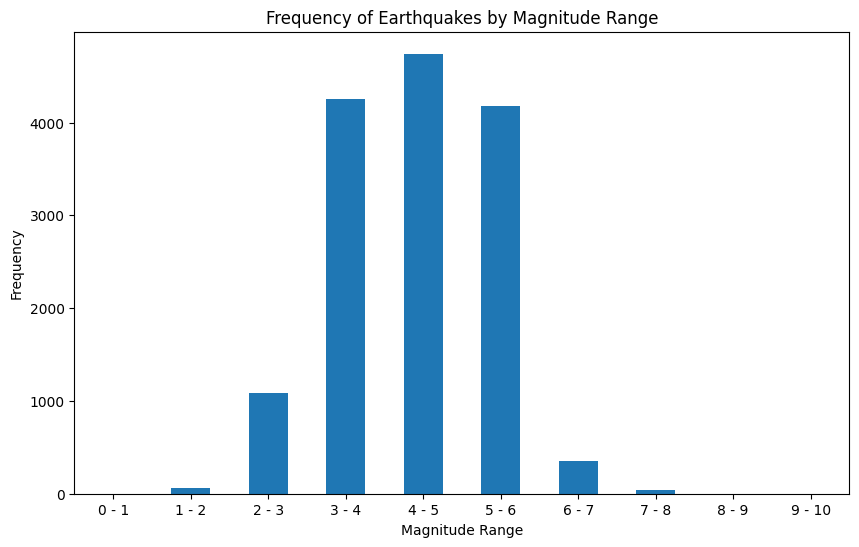

In [6]:
bins = list(range(0, 11))
labels = [f'{i} - {i + 1}' for i in bins[:-1]]

# Create a new column 'Magnitude Range' based on the bins
df["Magnitude Range"] = pd.cut(df["Magnitude"], bins = bins, labels = labels)
    
# Count the number of earthquakes in each magnitude range
magnitude_counts = df["Magnitude Range"].value_counts().sort_index()

# Plot the frequency of earthquakes for each magnitude range
plt.figure(figsize = (10, 6))
magnitude_counts.plot(kind = "bar")
plt.xlabel("Magnitude Range")
plt.ylabel("Frequency")
plt.title("Frequency of Earthquakes by Magnitude Range")
plt.xticks(rotation = 0)
plt.show()

95.42% of earthquakes with depth less than 300 km


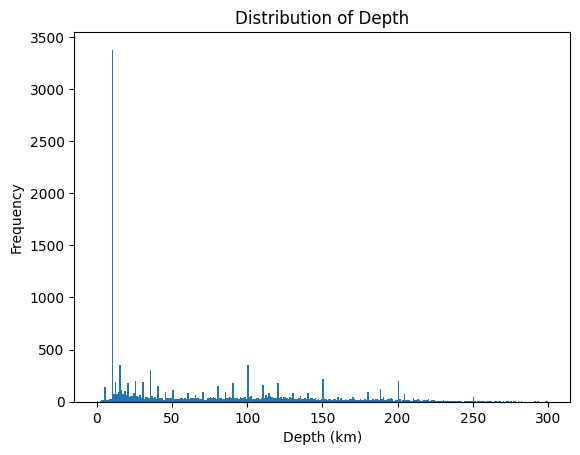

In [7]:

count_depth_less_than_300 =df[df["Depth (km)"] < 300].shape[0]
percentage_depth_less_than_300 = count_depth_less_than_300 / df.shape[0] * 100
print(f"{percentage_depth_less_than_300:.2f}% of earthquakes with depth less than 300 km")

# Determine the range of the data
min_depth = df["Depth (km)"].min()
max_depth = 300

# Create bin edges with 1 increment
bins = np.arange(min_depth, max_depth + 1, 1)

# distribution of depth
plt.hist(df["Depth (km)"], bins = bins)
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.title("Distribution of Depth")
plt.show()

50.07% of earthquakes were automatically detected
49.93% of earthquakes were manually detected


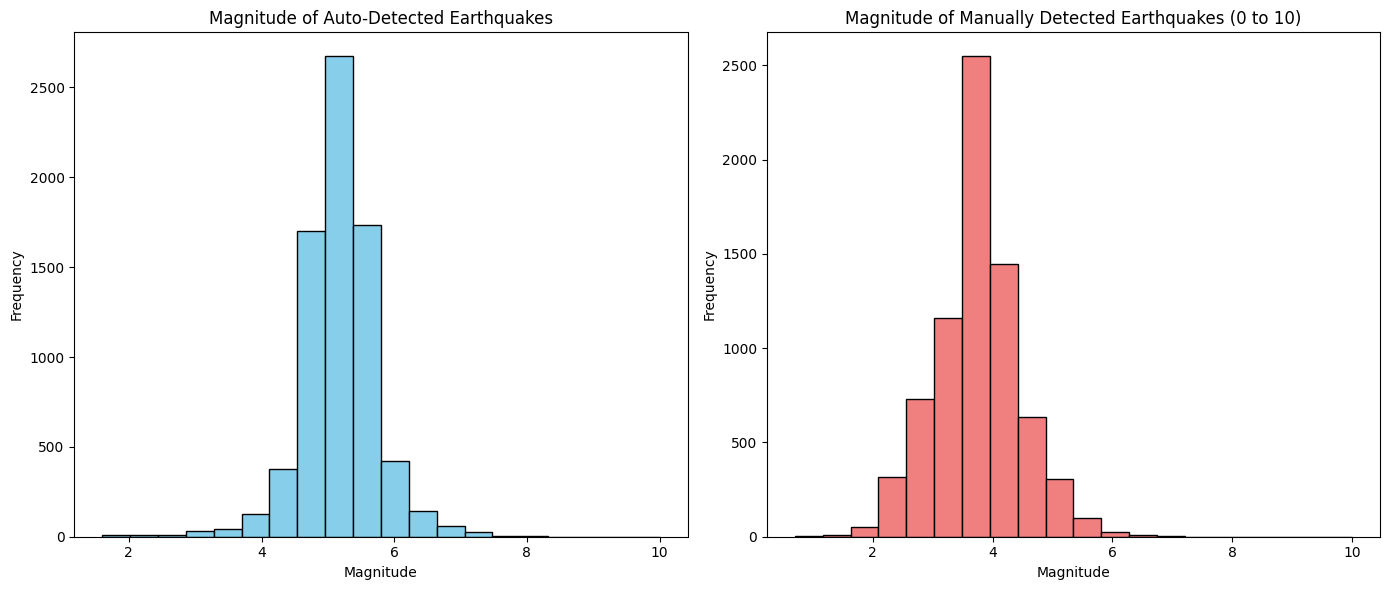

In [8]:
count_auto_detect = df[df["Mode"] == "A"].shape[0]
percentage_auto_detect = count_auto_detect/df.shape[0] * 100
print(f"{percentage_auto_detect:.2f}% of earthquakes were automatically detected")

count_manual_detect = df[df["Mode"] == "M"].shape[0]
percentage_manual_detect = count_manual_detect/df.shape[0] * 100
print(f"{percentage_manual_detect:.2f}% of earthquakes were manually detected")

auto_detected = df[df["Mode"] == "A"]
manual_detected = df[(df["Mode"] == "M") & (df["Magnitude"] >= 0) & (df["Magnitude"] <= 10)]
plt.figure(figsize = (14, 6))

# Histogram for auto-detected earthquakes
plt.subplot(1, 2, 1)
plt.hist(auto_detected["Magnitude"], bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Magnitude of Auto-Detected Earthquakes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")

# Histogram for manually detected earthquakes
plt.subplot(1, 2, 2)
plt.hist(manual_detected["Magnitude"], bins = 20, color = "lightcoral", edgecolor = "black")
plt.title("Magnitude of Manually Detected Earthquakes (0 to 10)")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [9]:
# Average Depth by Region
avg_depth_by_region = df.groupby("Region")["Depth (km)"].mean()
print(avg_depth_by_region)

Region
04 Km Southwest of Rawat, Rawalpindi                  18.0
04km SW of Kaghan, KP                                 33.0
05 Km Northwest of Gujrat, Punjab. (revised)           6.0
05 Km Southeast  of Mastung, Baluchistan (Revised)    30.0
05 km NW of Chitral, KP                               30.0
                                                      ... 
sunda Strait, Indonesia                               59.0
vanuatu islands                                       10.0
western Indian Antarctic Ridge                        10.0
western Iran                                          10.0
xizang.                                               10.0
Name: Depth (km), Length: 3221, dtype: float64


In [10]:
# Number of Events by Region
events_by_region = df["Region"].value_counts()
print(events_by_region)

Region
Hindu Kush Region, Afghanistan          1592
Afghanistan-Tajikistan Border Region    1214
Hindu Kush Region,Afghanistan            662
Tajikistan                               464
Southeastern Afghanistan                 230
                                        ... 
29 Km East of Harnai, Balchistan           1
Sout of Africa                             1
Hindu Kush Region, in Pakistan             1
4 Km NE of Bagh, AJK                       1
Pakistan, 40 km NW of Layyah City          1
Name: count, Length: 3221, dtype: int64


In [11]:
# Convert Date and Time columns to datetime
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time (utc)"], dayfirst = True)
df.set_index("Datetime", inplace = True)

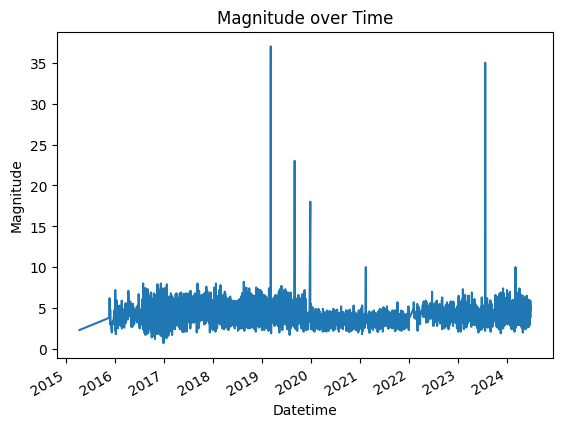

In [12]:
# Plot Magnitude over time
df["Magnitude"].plot()
plt.xlabel("Datetime")
plt.ylabel("Magnitude")
plt.title("Magnitude over Time")
plt.show()

In [13]:
# Convert direction (NEWS) to numerical values
df["Latitude"] = df["Latitude"].str.extract(r"(\d+\.\d+)")[0].astype(float) * df["Latitude"].str.extract(r"([NS])")[0].map({"N": 1, "S": -1})
df["Longitude"] = df["Longitude"].str.extract(r"(\d+\.\d+)")[0].astype(float) * df["Longitude"].str.extract(r"([EW])")[0].map({"E": 1, "W": -1})

invalid_rows = df[(df["Latitude"].abs() > 180) | (df["Longitude"].abs() > 180)]
print("Rows with invalid latitude or longitude:")
print(invalid_rows)

Rows with invalid latitude or longitude:
                           Date Time (utc)  \
Datetime                                     
2024-03-29 18:15:52  29/03/2024   18:15:52   
2019-04-07 07:15:28  07/04/2019   07:15:28   
2019-03-28 04:49:02  28/03/2019   04:49:02   
2019-02-25 05:01:21  25/02/2019   05:01:21   
2017-11-08 19:17:13  08/11/2017   19:17:13   
2016-12-23 22:32:21  23/12/2016   22:32:21   

                                                    Region  Magnitude  \
Datetime                                                                
2024-03-29 18:15:52   Afghanistan-Tajikistan Border Region        3.8   
2019-04-07 07:15:28                Flores Region Indonesia        4.6   
2019-03-28 04:49:02  Afghanistan-Tajikistan Border Region.        3.6   
2019-02-25 05:01:21             New Britain, Region P.N.G.        4.9   
2017-11-08 19:17:13                Sunda Strait, Indonesia        5.0   
2016-12-23 22:32:21                        Solomon Islands        5.5   

     

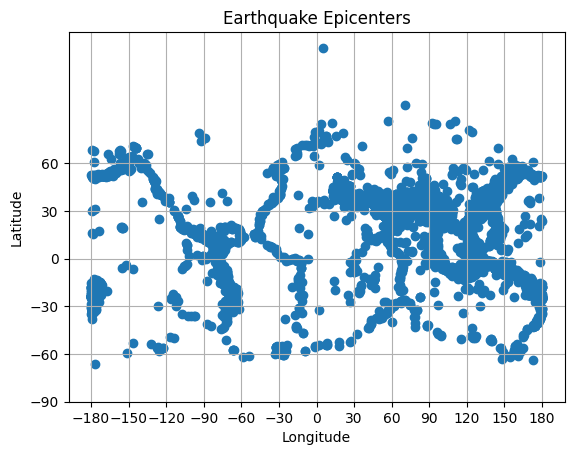

In [14]:
# Plot the locations (without map)
valid_rows = df[(df["Latitude"].abs() <= 180) & (df["Longitude"].abs() <= 180)]
plt.scatter(valid_rows["Longitude"], valid_rows["Latitude"])

plt.xticks(np.arange(-180, 181, 30))
plt.yticks(np.arange(-90, 90, 30))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Epicenters")
plt.grid(True)
plt.show()

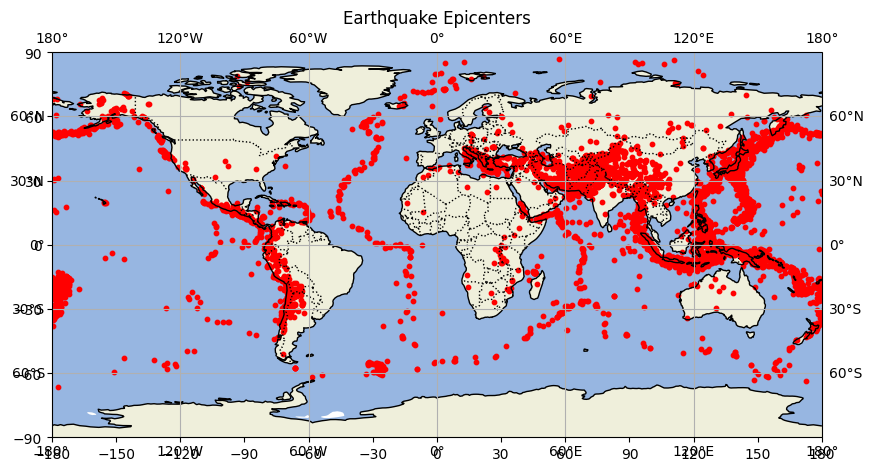

In [15]:
# Filter rows with latitude and longitude in the range of -180 to 180
valid_rows = df[(df["Latitude"].abs() <= 180) & (df["Longitude"].abs() <= 180)]

# Create a figure and add a map projection
fig = plt.figure(figsize = (10, 5))
ax = plt.axes(projection = ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ":")

# Plot the locations
plt.scatter(valid_rows["Longitude"], valid_rows["Latitude"], color = "red", s = 10, transform = ccrs.PlateCarree())

# Set the ticks for the x-axis and y-axis with a gap of 30
ax.set_xticks(np.arange(-180, 181, 30), crs = ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs = ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels = True)

# Plot the locations (with map)
plt.title("Earthquake Epicenters")
plt.show()

In [16]:
# Correlation analysis

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude = [np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns if necessary
df_numeric = df.drop(columns = non_numeric_columns)

# Check for NA/Null values
na_columns = df_numeric.columns[df_numeric.isna().any()].tolist()
print("Columns with NA/Null values:", na_columns)

# Handle NA/Null values (fill with 0 or drop)
# df_numeric = df_numeric.fillna(0)
df_numeric.dropna()

print("Data types after cleaning:", df_numeric.dtypes)

# Correlation analysis
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

Non-numeric columns: Index(['Date', 'Time (utc)', 'Region', 'Mode', 'Map', 'Magnitude Range'], dtype='object')
Columns with NA/Null values: ['Latitude', 'Longitude']
Data types after cleaning: Magnitude     float64
Depth (km)      int64
Latitude      float64
Longitude     float64
dtype: object
            Magnitude  Depth (km)  Latitude  Longitude
Magnitude    1.000000   -0.006319 -0.441865  -0.060160
Depth (km)  -0.006319    1.000000 -0.089661  -0.132958
Latitude    -0.441865   -0.089661  1.000000   0.134755
Longitude   -0.060160   -0.132958  0.134755   1.000000


In [17]:
# Fit a linear regression model
X = df_numeric["Depth (km)"]
y = df_numeric["Magnitude"]

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Extract the p-value for the slope coefficient
p_value = model.pvalues[1]  # p-value for the depth coefficient
print("p-value:", p_value)

# Decision based on p-value
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant linear relationship between magnitude and depth.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant linear relationship between magnitude and depth.")

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5879
Date:                Sun, 11 Aug 2024   Prob (F-statistic):              0.443
Time:                        02:25:07   Log-Likelihood:                -21595.
No. Observations:               14726   AIC:                         4.319e+04
Df Residuals:                   14724   BIC:                         4.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4706      0.011    401.320      0.0

C:\Users\hoafi\AppData\Local\Temp\ipykernel_44220\3979531078.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the depth coefficient
